In [177]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
df = pd.read_pickle('1000_playlists.pkl')
df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,64071,0,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
3,139950,27,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
6,91884,102,Apocalyptica,spotify:track:0t9Jd84JnsV8HRMaQzHUom,spotify:artist:4Lm0pUvmisUHMdoky5ch2I,I Don't Care,spotify:album:6Gk4CmJVnzK5DQ0CVyfPbB,221480,Worlds Collide,0t9Jd84JnsV8HRMaQzHUom,...,0.0799,0.336,179.076,audio_features,0t9Jd84JnsV8HRMaQzHUom,spotify:track:0t9Jd84JnsV8HRMaQzHUom,https://api.spotify.com/v1/tracks/0t9Jd84JnsV8...,https://api.spotify.com/v1/audio-analysis/0t9J...,221480,4
9,64071,1,Three Days Grace,spotify:track:4Rtc87aysfzgqRMFcSqWme,spotify:artist:2xiIXseIJcq3nG7C8fHeBj,Life Starts Now,spotify:album:0vv1zKShlm7WuawEup5Mf4,188080,Life Starts Now,4Rtc87aysfzgqRMFcSqWme,...,0.1430,0.323,162.064,audio_features,4Rtc87aysfzgqRMFcSqWme,spotify:track:4Rtc87aysfzgqRMFcSqWme,https://api.spotify.com/v1/tracks/4Rtc87aysfzg...,https://api.spotify.com/v1/audio-analysis/4Rtc...,188080,3
10,64071,2,Three Days Grace,spotify:track:6ymUtM7abyYOiQtv3GRzm4,spotify:artist:2xiIXseIJcq3nG7C8fHeBj,The Chain,spotify:album:5qiu8r3VFkpH8LOhECZiHs,230253,Lost In You EP,6ymUtM7abyYOiQtv3GRzm4,...,0.3360,0.350,155.944,audio_features,6ymUtM7abyYOiQtv3GRzm4,spotify:track:6ymUtM7abyYOiQtv3GRzm4,https://api.spotify.com/v1/tracks/6ymUtM7abyYO...,https://api.spotify.com/v1/audio-analysis/6ymU...,230253,4


In [179]:
samples = np.random.randint(low=1, high=50000, size=30)
y = df.iloc[samples]
df = df.drop(df.index[samples])
print(samples)

[ 5549 13587 12080 36586 13640 38605 29162 28212  2649  3038 21561 16333
 15281 18236 16306 49640  3322 38230  1892 47752 49767 20635 33134 30124
 31023 37703 49582 18271 33037 17735]


In [180]:
columns = ['danceability', 
          'energy', 'loudness', 
          'speechiness', 'acousticness','instrumentalness', 'liveness', 
          'valence', 'tempo', 'duration_ms_x']

df_std = stats.zscore(df[columns])

Clusters: 1
Clusters: 2
Clusters: 3
Clusters: 4
Clusters: 5
Clusters: 6
Clusters: 7
Clusters: 8
Clusters: 9
Clusters: 10
Clusters: 11
Clusters: 12
Clusters: 13
Clusters: 14
Clusters: 15
Clusters: 16
Clusters: 17
Clusters: 18
Clusters: 19


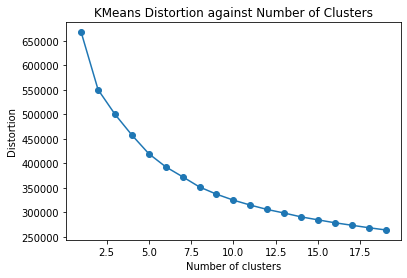

In [181]:
# Inspiration from: https://dev.to/nexttech/k-means-clustering-with-scikit-learn-14kk

distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_std)
    distortions.append(km.inertia_)
    print("Clusters: " + str(i))

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('KMeans Distortion against Number of Clusters')
plt.show()

In [182]:
# Select 10 clusters
km = KMeans(
        n_clusters=10, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
km.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

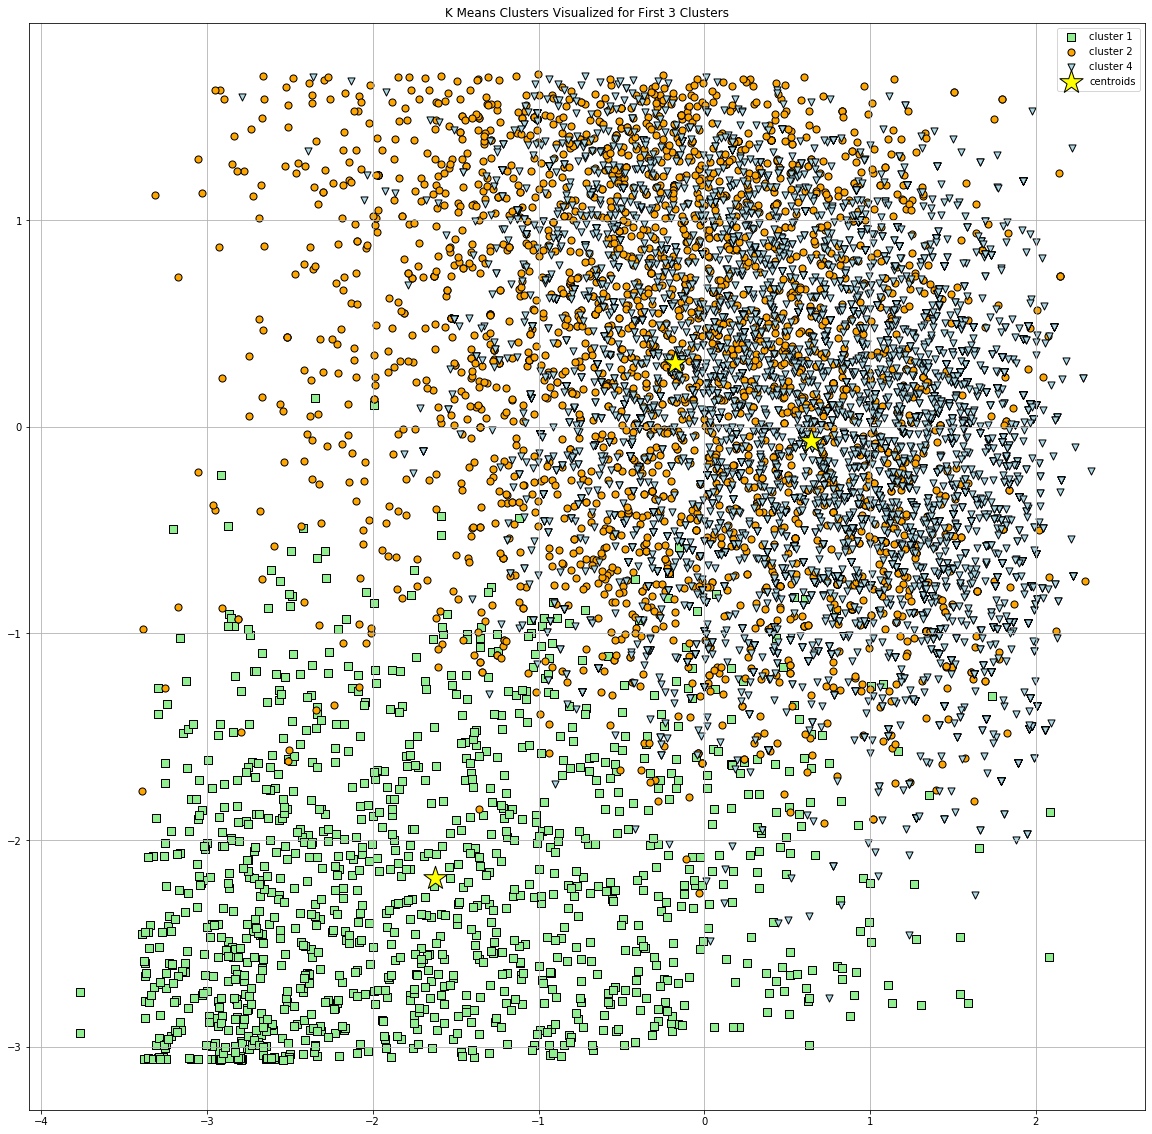

In [190]:
y_km = km.predict(df_std)
df['cluster'] = y_km

plt.figure(figsize=(20,20))

plt.scatter(df_std[y_km == 0, 0], df_std[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')

plt.scatter(df_std[y_km == 1, 0], df_std[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')

plt.scatter(df_std[y_km == 2, 0], df_std[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 4')

plt.scatter(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1],s=600, marker='*',c='yellow', edgecolor='black',label='centroids')

plt.scatter(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1],s=600, marker='*',c='yellow', edgecolor='black')

plt.scatter(km.cluster_centers_[2, 0], km.cluster_centers_[2, 1],s=600, marker='*',c='yellow', edgecolor='black')

plt.title('K Means Clusters Visualized for First 3 Clusters')
plt.legend()
plt.grid()
plt.show()

In [184]:
y_std = stats.zscore(y[columns])
predictions = km.predict(y_std)

In [185]:
predictions

array([1, 9, 2, 7, 2, 4, 6, 9, 2, 4, 8, 6, 9, 8, 1, 2, 4, 5, 7, 4, 8, 9,
       7, 7, 5, 2, 6, 2, 1, 9], dtype=int32)

In [186]:
y['cluster'] = predictions

In [187]:
# Create new playlist
suggested_playlist = pd.DataFrame()

for index, row in y.iterrows():
    suggested_playlist = suggested_playlist.append(df[df['cluster'] == row['cluster']].sample())

In [188]:
suggested_playlist

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,cluster
371981,49687,12,Anthrax,spotify:track:3HlnQdKyjxZaUs95cLGOKh,spotify:artist:3JysSUOyfVs1UQ0UaESheP,Deathrider,spotify:album:1xg9CNkTZ6zxN48GxyjANK,192866,Fistful of Metal,3HlnQdKyjxZaUs95cLGOKh,...,0.176,156.830,audio_features,3HlnQdKyjxZaUs95cLGOKh,spotify:track:3HlnQdKyjxZaUs95cLGOKh,https://api.spotify.com/v1/tracks/3HlnQdKyjxZa...,https://api.spotify.com/v1/audio-analysis/3Hln...,192867,4,1
249541,125343,24,Gwen Stefani,spotify:track:26eOTllWPn7oKuDUJnsJwF,spotify:artist:4yiQZ8tQPux8cPriYMWUFP,The Sweet Escape,spotify:album:2uoNsOC1w0zkRp0TE2uzuI,246466,The Sweet Escape,26eOTllWPn7oKuDUJnsJwF,...,0.730,119.961,audio_features,26eOTllWPn7oKuDUJnsJwF,spotify:track:26eOTllWPn7oKuDUJnsJwF,https://api.spotify.com/v1/tracks/26eOTllWPn7o...,https://api.spotify.com/v1/audio-analysis/26eO...,246467,4,9
110581,143089,33,Kanye West,spotify:track:5XJJdNPkwmbUwE79gv0NxK,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Gold Digger,spotify:album:4GRDFQ9HRoO0by8H0r2a3I,207626,Late Registration,5XJJdNPkwmbUwE79gv0NxK,...,0.625,92.880,audio_features,5XJJdNPkwmbUwE79gv0NxK,spotify:track:5XJJdNPkwmbUwE79gv0NxK,https://api.spotify.com/v1/tracks/5XJJdNPkwmbU...,https://api.spotify.com/v1/audio-analysis/5XJJ...,207401,4,2
356169,145812,54,Rudimental,spotify:track:0vbbhcA6okLzvsy6WSTlLg,spotify:artist:4WN5naL3ofxrVBgFpguzKo,Lay It All On Me (feat. Ed Sheeran),spotify:album:6NoBzYmh5gUusGPCfg0pct,242440,x,0vbbhcA6okLzvsy6WSTlLg,...,0.483,122.531,audio_features,0vbbhcA6okLzvsy6WSTlLg,spotify:track:0vbbhcA6okLzvsy6WSTlLg,https://api.spotify.com/v1/tracks/0vbbhcA6okLz...,https://api.spotify.com/v1/audio-analysis/0vbb...,242440,4,7
152389,25050,63,Kendrick Lamar,spotify:track:6HZILIRieu8S0iqY8kIKhj,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,DNA.,spotify:album:4eLPsYPBmXABThSJ821sqY,185946,DAMN.,6HZILIRieu8S0iqY8kIKhj,...,0.422,139.913,audio_features,6HZILIRieu8S0iqY8kIKhj,spotify:track:6HZILIRieu8S0iqY8kIKhj,https://api.spotify.com/v1/tracks/6HZILIRieu8S...,https://api.spotify.com/v1/audio-analysis/6HZI...,185947,4,2
378317,33873,210,The Stanfields,spotify:track:3gCYUsz295ez7pXxuNORci,spotify:artist:0w8r7Pn1wm1SCegYhVIQtJ,The Bloody Dotted Line,spotify:album:3JuX6QCI7UhHhRdI7C98pf,253773,For King and Country,3gCYUsz295ez7pXxuNORci,...,0.885,119.399,audio_features,3gCYUsz295ez7pXxuNORci,spotify:track:3gCYUsz295ez7pXxuNORci,https://api.spotify.com/v1/tracks/3gCYUsz295ez...,https://api.spotify.com/v1/audio-analysis/3gCY...,253773,4,4
352047,95571,8,Brennan Heart,spotify:track:1phmF6Y0ZgV9kt3EaiEy4X,spotify:artist:5QySqc6yAFDx9m7fedFZmC,Coming Home - Galactixx Remix,spotify:album:5eMbtMXhEkxu9zVlvU3nev,247600,I AM HARDSTYLE (The Album),1phmF6Y0ZgV9kt3EaiEy4X,...,0.204,150.012,audio_features,1phmF6Y0ZgV9kt3EaiEy4X,spotify:track:1phmF6Y0ZgV9kt3EaiEy4X,https://api.spotify.com/v1/tracks/1phmF6Y0ZgV9...,https://api.spotify.com/v1/audio-analysis/1phm...,247600,4,6
3605,58344,152,Rihanna,spotify:track:30VrBsh1STRBoIrhQOAwzK,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Disturbia,spotify:album:1YhbfKnjrFgnYyWz6cn9mN,238573,Good Girl Gone Bad,30VrBsh1STRBoIrhQOAwzK,...,0.717,124.904,audio_features,30VrBsh1STRBoIrhQOAwzK,spotify:track:30VrBsh1STRBoIrhQOAwzK,https://api.spotify.com/v1/tracks/30VrBsh1STRB...,https://api.spotify.com/v1/audio-analysis/30Vr...,238573,4,9
301908,179550,58,DJ Drill,spotify:track:6eGc0LhWD5oyIxzhN2e42X,spotify:artist:0vvT956B4fWmEN61Y4hUmO,Buy It,spotify:album:3fkcQSF1UBEIn7PZd2ameo,160542,"#Savages, Vol. 5.5",6eGc0LhWD5oyIxzhN2e42X,...,0.457,144.989,audio_features,6eGc0LhWD5oyIxzhN2e42X,spotify:track:6eGc0LhWD5oyIxzhN2e42X,https://api.spotify.com/v1/tracks/6eGc0LhWD5oy...,https://api.spotify.com/v1/audio-analysis/6eGc...,160543,4,2
259679,145657,208,Vampire Weekend,spotify:track:0jnO8w4GFIdM4qgH8P896h,spotify:artist:5BvJzeQpmsdsFp4HGUYUEx,Everlasting Arms,spotify:album:6rhe02p

In [189]:
y

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,spotify_id,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,cluster
68483,45246,181,Radical Face,spotify:track:13PUJCvdTSCT1dn70tlGdm,spotify:artist:5EM6xJN2QNk0cL7EEm9HR9,"Welcome Home, Son",spotify:album:0VYi6aRMwxXpfvNwDCr3bB,285320,Ghost,13PUJCvdTSCT1dn70tlGdm,...,0.3940,144.994,audio_features,13PUJCvdTSCT1dn70tlGdm,spotify:track:13PUJCvdTSCT1dn70tlGdm,https://api.spotify.com/v1/tracks/13PUJCvdTSCT...,https://api.spotify.com/v1/audio-analysis/13PU...,285320,3,1
170822,117989,144,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,1AWQoqb9bSvzTjaLralEkT,...,0.8180,100.972,audio_features,1AWQoqb9bSvzTjaLralEkT,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,267267,4,9
153684,143013,22,21 Savage,spotify:track:6fwdbPMwP1zVStm8FybmkO,spotify:artist:1URnnhqYAYcrqrcwql10ft,X (feat. Future),spotify:album:4I3EcXD4e3KcEoDJfFEZ5b,258880,Savage Mode,6fwdbPMwP1zVStm8FybmkO,...,0.1110,149.004,audio_features,6fwdbPMwP1zVStm8FybmkO,spotify:track:6fwdbPMwP1zVStm8FybmkO,https://api.spotify.com/v1/tracks/6fwdbPMwP1zV...,https://api.spotify.com/v1/audio-analysis/6fwd...,258880,4,2
322927,136282,132,Vance Joy,spotify:track:2qEv3RLo2KTgjP844901gV,spotify:artist:10exVja0key0uqUkk6LJRT,First Time,spotify:album:6rIbiUMmZJfqJRnXhVxFvg,224626,Dream Your Life Away,2qEv3RLo2KTgjP844901gV,...,0.3900,116.009,audio_features,2qEv3RLo2KTgjP844901gV,spotify:track:2qEv3RLo2KTgjP844901gV,https://api.spotify.com/v1/tracks/2qEv3RLo2KTg...,https://api.spotify.com/v1/audio-analysis/2qEv...,224627,4,7
171692,183977,45,Blackstreet,spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ,spotify:artist:2P3cjUru4H3fhSXXNxE9kA,No Diggity,spotify:album:2zGZLQiFl9UubtrVmtIkbi,304600,Another Level,6MdqqkQ8sSC0WB4i8PyRuQ,...,0.6700,88.641,audio_features,6MdqqkQ8sSC0WB4i8PyRuQ,spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ,https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...,https://api.spotify.com/v1/audio-analysis/6Mdq...,304600,4,2
329784,25908,8,Los Rieleros Del Norte,spotify:track:2OFmcOC5m9iAvt4kcdXBSz,spotify:artist:59xlizZFIFUvLC0I8iV2Jv,El Columpio,spotify:album:09bVCvqV5G7r8DIEls8zjB,199333,Invencible,2OFmcOC5m9iAvt4kcdXBSz,...,0.7680,165.908,audio_features,2OFmcOC5m9iAvt4kcdXBSz,spotify:track:2OFmcOC5m9iAvt4kcdXBSz,https://api.spotify.com/v1/tracks/2OFmcOC5m9iA...,https://api.spotify.com/v1/audio-analysis/2OFm...,199333,3,4
288530,46988,14,Alter Bridge,spotify:track:0d0N0MTvS6ykyZz1IGyrIs,spotify:artist:4DWX7u8BV0vZIQSpJQQDWU,Open Your Eyes,spotify:album:7A2sEhGMyEhCZuuBBqgeRv,298600,One Day Remains,0d0N0MTvS6ykyZz1IGyrIs,...,0.3810,162.371,audio_features,0d0N0MTvS6ykyZz1IGyrIs,spotify:track:0d0N0MTvS6ykyZz1IGyrIs,https://api.spotify.com/v1/tracks/0d0N0MTvS6yk...,https://api.spotify.com/v1/audio-analysis/0d0N...,298600,4,6
284010,56383,74,ScHoolboy Q,spotify:track:0zO8ctW0UiuOefR87OeJOZ,spotify:artist:5IcR3N7QB1j6KBL8eImZ8m,Collard Greens,spotify:album:7Et3bSTLLqdABO1qCxUplS,299960,Oxymoron,0zO8ctW0UiuOefR87OeJOZ,...,0.6500,153.954,audio_features,0zO8ctW0UiuOefR87OeJOZ,spotify:track:0zO8ctW0UiuOefR87OeJOZ,https://api.spotify.com/v1/tracks/0zO8ctW0UiuO...,https://api.spotify.com/v1/audio-analysis/0zO8...,299960,4,9
35622,32821,93,Drake,spotify:track:2YaDRtIlQiZ5WDDB2YuEOC,spotify:artist:3TVXtAsR1Inumwj472S9r4,You & The 6,spotify:album:0ptlfJfwGTy0Yvrk14JK1I,264906,If You're Reading This It's Too Late,2YaDRtIlQiZ5WDDB2YuEOC,...,0.2230,154.531,audio_features,2YaDRtIlQiZ5WDDB2YuEOC,spotify:track:2YaDRtIlQiZ5WDDB2YuEOC,https://api.spotify.com/v1/tracks/2YaDRtIlQiZ5...,https://api.spotify.com/v1/audio-analysis/2YaD...,264907,4,2
41004,77450,10,Lynyrd Skynyrd,spotify:track:4CJVkjo5WpmUAKp3R44LNb,spotify:artist:4MVyzYMgTwdP7Z49wAZHx0,Sweet Home Alabama,spotify:album:5rtOJsiDDjA9V5306cyTR